In [13]:
# Estimate a random forest on data to see important features
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder




In [15]:
batch_data = pd.read_csv("../../data/datasets/batch_meta_combine.csv")

# Rename herd to keep it in regex
batch_data = batch_data.rename(columns={'herd': 'herdx'})

#Split into X and Y
X = batch_data.filter(regex=("x.*"))
y = batch_data['group_class']


#onehot encode herd

#one_hot = pd.get_dummies(X['herdx'])
# Dropherd as it is now encoded
X = X.drop('herdx',axis = 1)
# Join the encoded df
#X = X.join(one_hot)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [17]:
clf = RandomForestClassifier(min_samples_leaf=1, random_state=1)
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)

clf.score(X_test,y_test)

0.7962962962962963

In [18]:
conf_mat = confusion_matrix(y_test, y_test_predict)
print(conf_mat)

[[ 5  8]
 [ 3 38]]


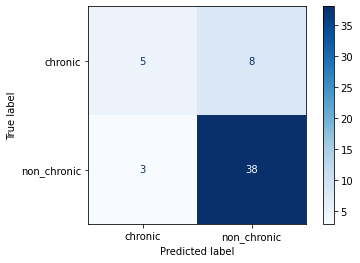

In [21]:
 plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['chronic','non_chronic'],
                                 cmap=plt.cm.Blues)
                                 #normalize='false')

In [20]:
import_val = clf.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({
    'feature':features,
    'importance':import_val
})

rf_features = feature_importances.sort_values(by=['importance'],ascending = False)

rf_features.to_csv('../../data/datasets/rf_features.csv')